# Time series values for Vatnsendi pumpstation

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df_pressure_1 = pd.read_excel("data/H-KOP-VE-ÞS212.xlsx")
df_pressure_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure_2 = pd.read_excel("data/H-KOP-VE-ÞS213.xlsx")
df_pressure_2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

In [30]:
df_pressure_1.head()

,start_time,value
0,2022-03-14 23:00:00,9.0
1,2022-03-13 16:00:00,9.0
2,2022-03-08 02:00:00,9.0
3,2022-03-08 03:00:00,9.0
4,2022-03-13 18:00:00,9.0


In [31]:
df_pressure_2.head()

,start_time,value
0,2022-03-14 23:00:00,5.60
1,2022-03-13 16:00:00,5.55
2,2022-03-08 02:00:00,5.56
3,2022-03-08 03:00:00,5.56
4,2022-03-13 18:00:00,5.63


In [36]:
# Convert 'start_time' to datetime format
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-10-03"
df_specific_day = df_pressure_1[df_pressure_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-10-03 01:00:00,9.01,1.000966
2024-10-03 02:00:00,9.01,1.000966
2024-10-03 03:00:00,9.00,0.999855
2024-10-03 04:00:00,9.00,0.999855
2024-10-03 05:00:00,9.00,0.999855
2024-10-03 06:00:00,9.00,0.999855
2024-10-03 07:00:00,9.00,0.999855
2024-10-03 08:00:00,9.00,0.999855
2024-10-03 09:00:00,9.00,0.999855


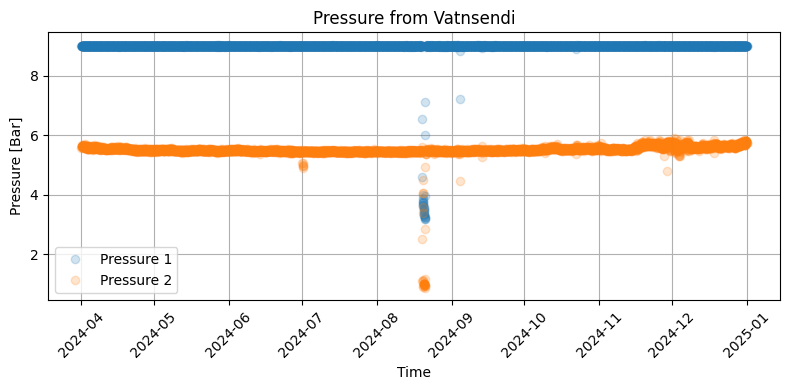

In [33]:
# Convert 'start_time' to datetime format for both DataFrames
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')
df_pressure_2['start_time'] = pd.to_datetime(df_pressure_2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_pressure_1[(df_pressure_1['start_time'].dt.year == 2024) & (df_pressure_1['start_time'].dt.month > 3)]
df_filtered_2 = df_pressure_2[(df_pressure_2['start_time'].dt.year == 2024) & (df_pressure_2['start_time'].dt.month > 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_pressure_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 1')  # Alpha controls opacity

# Plot pressure_2 from df_pressure_2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
df_flow_1 = pd.read_excel("data/H-KOP-VE-RS212.xlsx")
df_flow_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow2 = pd.read_excel("data/H-KOP-VE-RS213.xlsx")
df_flow2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

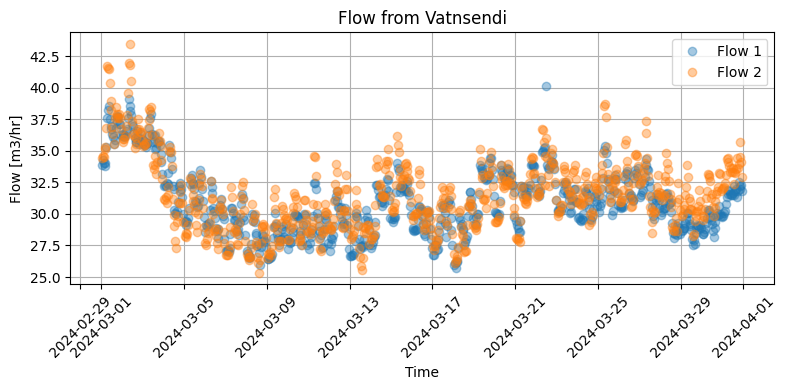

In [35]:
# Convert 'start_time' to datetime format for both DataFrames
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) & (df_flow_1['start_time'].dt.month == 3)]
df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024) & (df_flow2['start_time'].dt.month == 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_flow_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.4, label='Flow 1')  # Alpha controls opacity

# Plot pressure_2 from df_flow2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.4, label='Flow 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m3/hr]')
plt.title('Flow from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
